<a href="https://colab.research.google.com/github/GhoshAni/100-plus-Python-programming-exercises-extended/blob/master/Deep_Learning_Assignment_Task_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning Assignment- Task B


In [5]:
"""created on 5th April 2022
@author Anirima Ghosh """

'created on 5th April 2022\n@author Anirima Ghosh '

In [13]:
# import the python libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils 
from keras.datasets import cifar10
from keras import backend as K
from matplotlib import pyplot
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

In [14]:
# load the CIFAR10 dataset in train and test
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [15]:
# split the train data in train and valid
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

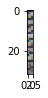

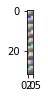

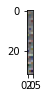

In [19]:
for i in range(0, 3):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(Image.fromarray(np.rollaxis(X_train[i],0,3),'RGB'))
    pyplot.show()

In [21]:
seed = 7
np.random.seed(seed)

# convert the data  to integer
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_valid = X_valid.astype('float32')

In [22]:
# normalize the train test and valid data
X_train = X_train / 255.0
X_test = X_test / 255.0
X_valid = X_valid / 255.0

In [24]:
print('X_train dimensions', X_train.shape)

print('X_test dimensions', X_test.shape)

print('X_valid dimensions', X_valid.shape)

X_train dimensions (45000, 32, 32, 3)
X_test dimensions (10000, 32, 32, 3)
X_valid dimensions (5000, 32, 32, 3)


In [25]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_valid = np_utils.to_categorical(y_valid)

In [38]:
num_classes = y_test.shape[1]
print(num_classes)
## there are 10 class of Images

10


In [35]:
# create the convolution model
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape = (3,32,32), padding = 'same', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
epochs = 25 
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [36]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [32]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 3, 32, 32)         9248      
                                                                 
 dropout_4 (Dropout)         (None, 3, 32, 32)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 32, 32)         9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 16, 32)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 16, 64)         18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 16, 64)        0         
 2D)                                                  